# Introduction to NumPy: scientific computing in Python

NumPy’s main object is the homogeneous multidimensional array, called `ndarray`. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers.

## Array creation

You can create an array from a regular Python list or tuple using the `array()` function

The type of the resulting array is deduced from the type of the elements in the sequences.

In [ ]:
import numpy as np

a = np.array([2, 3, 4])
a.dtype

dtype('int64')

In [ ]:
a

array([2, 3, 4])

In [ ]:
b = np.array([1.2, 3.5, 5.1])
b.dtype

dtype('float64')

With the `array()` function, you can create n-dimensional arrays

In [ ]:
c = np.array([[0.5, 1.2, 0.3], [3.1, 0.9, -1.0], [2.2, -1.9, 2.0]])
c

array([[ 0.5,  1.2,  0.3],
       [ 3.1,  0.9, -1. ],
       [ 2.2, -1.9,  2. ]])

In NumPy dimensions are called axes. The *shape* of an array defines the number of elements along each of its axes

In [ ]:
print(f"Shape: {c.shape}")  # number of elements along each axis
print(f"Number of axes: {c.ndim}")  # number of dimensions/axes
print(f"Size: {c.size}")  # total number of elements

Shape: (3, 3)
Number of axes: 2
Size: 9


You can use the `arange()` and `linspace()` functions to create sequences of numbers

In [ ]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

Often, the elements of an array are originally unknown, but its size is known.

The function `zeros()` creates an array full of zeros, the function `ones()` creates an array full of ones

In [ ]:
np.zeros((2, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
np.ones((3, 5, 5), dtype=np.int8)

array([[[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]]], dtype=int8)

## Basic operations

Arithmetic operators on arrays apply *elementwise*. A new array is created and filled with the result

In [ ]:
a = np.array([10, 20, 30, 40, 50])
b = np.arange(5)

b

array([0, 1, 2, 3, 4])

In [ ]:
a + b

array([10, 21, 32, 43, 54])

In [ ]:
b**2 #non con b^2

array([ 0,  1,  4,  9, 16])

In [ ]:
np.exp(-np.sqrt(a)) #* np.sin(b)

array([0.04232922, 0.01142289, 0.00418091, 0.00179176, 0.00084933])

In [ ]:
a < 30

array([ True,  True, False, False, False])

In [ ]:
np.where(a < 30, 1, 0)

array([1, 1, 0, 0, 0])

You can compute the `sum()`, `min()`, `max()`, etc. of the elements of an array

In [ ]:
print(c)
print(c.sum())
print(c.mean())

[[ 0.5  1.2  0.3]
 [ 3.1  0.9 -1. ]
 [ 2.2 -1.9  2. ]]
7.3
0.8111111111111111


By default, these operations apply to the *flattened* array (as if it were a list of numbers). By specifying the axis parameter you can apply an operation along the specified axis of the array

In [ ]:
print(f"Max along axis-0 (column-wise): {c.max(axis=0)}")
print(f"Min along axis-1 (row-wise): {c.min(axis=1)}")

Max along axis-0 (column-wise): [3.1 1.2 2. ]
Min along axis-1 (row-wise): [ 0.3 -1.  -1.9]


## Indexing, slicing, and iterating

One-dimensional arrays can be indexed, sliced and iterated over, much like lists and other Python sequences

In [ ]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [ ]:
a[3]

27

In [ ]:
# Elements from position 4 to position 7 (exclusive)
a[4:7]

array([ 64, 125, 216])

In [ ]:
# From start to position 6, exclusive, set every 2nd element to 1000
a[:6:2] = 1000
a

array([1000,    1, 1000,   27, 1000,  125,  216,  343,  512,  729])

In [ ]:
a[::-1]  # reversed a

array([ 729,  512,  343,  216,  125, 1000,   27, 1000,    1, 1000])

In [ ]:
a[a > 300]  # elements > 300

array([1000, 1000, 1000,  343,  512,  729])

In [ ]:
rng = np.random.default_rng(42)  # define a random number generator
b = rng.integers(5, size=(4, 4))
b

array([[0, 3, 3, 2],
       [2, 4, 0, 3],
       [1, 0, 2, 4],
       [3, 3, 3, 3]])

In [ ]:
b[2, 3]

4

In [ ]:
b[:, 1]  # column at position 1

array([3, 4, 0, 3])

The expression `b[i]` is treated as an 
`i` followed by as many instances of `:` as needed to represent the remaining axes

In [ ]:
b[1]  # row at position 1

array([2, 4, 0, 3])

In [ ]:
b[-1]  # last row. Equivalent to b[-1, :]

array([3, 3, 3, 3])

Iterating over multidimensional arrays is done with respect to the first axis

In [ ]:
for row in b:
  print(row)

[0 3 3 2]
[2 4 0 3]
[1 0 2 4]
[3 3 3 3]


To iterate over each element of the array, you can use the `flat` property

In [ ]:
for element in b.flat:
  print(element, end=" ")

0 3 3 2 2 4 0 3 1 0 2 4 3 3 3 3 

## Reshaping

The shape of an array can be changed with various commands

In [ ]:
a = rng.integers(10, size=(3, 4))
a

array([[5, 1, 8, 4],
       [5, 3, 1, 9],
       [7, 6, 4, 8]])

The `flatten()` function returns a flattened (i.e., 1D) array

In [ ]:
a.flatten()

array([5, 1, 8, 4, 5, 3, 1, 9, 7, 6, 4, 8])

In [ ]:
a.flatten().shape

(12,)

You can get the transposed array with `T` attribute

In [ ]:
a.T

array([[5, 5, 7],
       [1, 3, 6],
       [8, 1, 4],
       [4, 9, 8]])

In [ ]:
a.T.shape

(4, 3)

The `reshape()` function lets you specify the size along each axis

In [ ]:
a.reshape(2, 6)

array([[5, 1, 8, 4, 5, 3],
       [1, 9, 7, 6, 4, 8]])

If a dimension is given as -1 in a reshaping operation, its size is automatically calculated

In [ ]:
a.reshape(6, -1)

array([[5, 1],
       [8, 4],
       [5, 3],
       [1, 9],
       [7, 6],
       [4, 8]])

In [ ]:
a.reshape(3, 2, -1)

array([[[5, 1],
        [8, 4]],

       [[5, 3],
        [1, 9]],

       [[7, 6],
        [4, 8]]])

## Stacking arrays

Several arrays can be stacked together along different axes

In [ ]:
a = rng.integers(10, size=(3, 3))
a

array([[2, 6, 1],
       [7, 7, 3],
       [0, 9, 4]])

In [ ]:
b = rng.integers(10, size=(3, 3))
b

array([[8, 6, 7],
       [7, 1, 3],
       [4, 4, 0]])

`concatenate()` allows to join a sequence of arrays along an existing axis

In [ ]:
np.concatenate((a, b), axis=0)

array([[2, 6, 1],
       [7, 7, 3],
       [0, 9, 4],
       [8, 6, 7],
       [7, 1, 3],
       [4, 4, 0]])

In [ ]:
np.concatenate((a, b), axis=1)

array([[2, 6, 1, 8, 6, 7],
       [7, 7, 3, 7, 1, 3],
       [0, 9, 4, 4, 4, 0]])

In [ ]:
np.concatenate((a, b), axis=None)

array([2, 6, 1, 7, 7, 3, 0, 9, 4, 8, 6, 7, 7, 1, 3, 4, 4, 0])

# Introduction to pandas: Python data analysis library

pandas has two main data structures:

1. Series: a 1-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)
2. DataFrame: a 2-dimensional labeled data structure with columns of potentially different types

In [2]:
import pandas as pd

## Creation of a **Series** object

A **Series** can be created from:
- an ndarray
- a Python dict
- a scalar value (like 5)

### Creating a **Series** from an ndarray

In [ ]:
data = rng.normal(size=5)
s = pd.Series(data)
s

0    0.412733
1    0.430821
2    2.141648
3   -0.406415
4   -0.512243
dtype: float64

The **Series** `s` is composed of **values** (i.e., `data`) and an **index** (i.e., a list of axis labels)

In [ ]:
print(f"values={s.values}")
print(f"index={s.index}")

values=[ 0.41273261  0.430821    2.1416476  -0.40641502 -0.51224273]
index=RangeIndex(start=0, stop=5, step=1)


You can also pass a custom index having the same `len` of data

In [ ]:
s = pd.Series(data, index=["a", "b", "c", "d", "e"])
s

a    0.412733
b    0.430821
c    2.141648
d   -0.406415
e   -0.512243
dtype: float64

### Creating a **Series** from a Python dict

In [ ]:
d = {"b": 1, "a": 0, "c": 2}

pd.Series(d)

b    1
a    0
c    2
dtype: int64

When you pass a custom index, its values will be matched to the keys of the dictionary. If the key is missing, the corresponding value will be assigned to NaN (not a number), which is the standard missing data marker used in pandas

In [ ]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

### Creating a **Series** from a scalar value

If `data` is a scalar value, an index must be provided. The value will be repeated to match the length of index

In [ ]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

## A **Series** acts like an ndarray

In [ ]:
s[0]

0.4127326115959884

In [ ]:
s[:3] 

a    0.412733
b    0.430821
c    2.141648
dtype: float64

In [ ]:
s[[3, 0, 1]]

d   -0.406415
a    0.412733
b    0.430821
dtype: float64

Operations between **Series** are vectorized as for ndarrays

In [ ]:
s + s

a    0.825465
b    0.861642
c    4.283295
d   -0.812830
e   -1.024485
dtype: float64

In [ ]:
np.exp(s)

a    1.510941
b    1.538520
c    8.513453
d    0.666034
e    0.599150
dtype: float64

## A **Series** acts like a fixed-size dict



In [ ]:
s["a"]

0.4127326115959884

In [ ]:
s["e"] = 1.0
s

a    0.412733
b    0.430821
c    2.141648
d   -0.406415
e    1.000000
dtype: float64

In [ ]:
"b" in s

True

In [ ]:
"f" in s

False

## Creating a **DataFrame** object
You can think of a **DataFrame** like a spreadsheet or SQL table, or a dict of Series objects.

A **DataFrame** can be built in many different ways using:

*   dict of 1D ndarrays, lists, dicts, or Series
*   2D ndarray
*   a Series
*   another DataFrame

### Creating a **DataFrame** from dicts

In [4]:
d_lists = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
df = pd.DataFrame(d_lists)#, index=["a", "b", "c", "d"])
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


The **DataFrame** `df` is composed of **values**, **index** and **columns**

In [ ]:
print(f"values={df.values}")
print(f"index={df.index}")
print(f"columns={df.columns}")

values=[[1. 4.]
 [2. 3.]
 [3. 2.]
 [4. 1.]]
index=Index(['a', 'b', 'c', 'd'], dtype='object')
columns=Index(['one', 'two'], dtype='object')


When creating a **DataFrame** from a dict of Series, the resulting index will be the union of the indexes of the various Series

In [ ]:
from pandas.core.window.expanding import template_see_also
d_series = {
    "Name": pd.Series(["John", "Jane", "Judy", "Jessica", "Joe"], index=[0, 1, 2, 3, 4]),
    "Age": pd.Series([40, 19, 38, 43, 25], index=[0, 1, 2, 3, 4]),
    "Height": pd.Series([160, 170, 162, 181], index=[0, 1, 2, 4]),
}
df = pd.DataFrame(d_series)
df

goog = load(...) 
tesla = load(...)
amzn = load (...)

dict_stocks ={"goog": goog, "tesla": tesla, "amzn": amzn}
df = pd.DataDrame(dict_stocks)

,Name,Age,Height
0,John,40,160.0
1,Jane,19,170.0
2,Judy,38,162.0
3,Jessica,43,NaN
4,Joe,25,181.0


You can check for NaN entries with `isna()` or `isnull()`

In [ ]:
df.isna()  # == df.isnull()

,Name,Age,Height
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,False


### Creating a **DataFrame** from an ndarray

In [ ]:
data = rng.normal(size=(4, 2))
pd.DataFrame(data, index=["a", "b", "c", "d"], columns=["random_1", "random_2"])

,random_1,random_2
a,-0.813773,0.615979
b,1.128972,-0.113947
c,-0.840156,-0.824481
d,0.650593,0.743254


## Importing data into a DataFrame

Let's download the dataset

In [5]:
!wget https://www.dropbox.com/s/84fnsub46ddt6hs/Wisconsin_breast_cancer_dataset.csv?dl=0 -O wisconsin.csv 

--2023-03-28 07:35:35--  https://www.dropbox.com/s/84fnsub46ddt6hs/Wisconsin_breast_cancer_dataset.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/84fnsub46ddt6hs/Wisconsin_breast_cancer_dataset.csv [following]
--2023-03-28 07:35:35--  https://www.dropbox.com/s/raw/84fnsub46ddt6hs/Wisconsin_breast_cancer_dataset.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc84bae5f28db5879766bc38c31e.dl.dropboxusercontent.com/cd/0/inline/B5Ey2s6C3T8B2_is7AmeKSwovG7QVQy92fqLgZ3RGMiDEHVeBAB7jPgdCYy8DhDtIyk0f_NpcRiO0QP0TkDOYwhXH_wTZRr-FJ1jw15XJ0LXqWK2H118XYKti_7SQnpd4FmcU6tmqA2O8tSiYRc5eQVoOCsXMU8tyMq0fujczjZXNw/file# [following]
--2023-03-28 07:35:36--  https://uc84bae5f28db5879766bc38c31e.dl.dropboxusercontent.com/cd/0/inline/B5Ey2s

### Reading a csv file

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data): features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [6]:
df_breast = pd.read_csv("wisconsin.csv")
df_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df_breast.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Indexing and column selection
There are several ways to select data from a **DataFrame**:
*   select a column: `df["col_name"]` (returns a Series)




In [ ]:
df_breast["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

*   select multiple columns: `df[["col_name_1", "col_name_2", "col_name_3"]]` (returns a DataFrame)

In [ ]:
df_breast[["id", "diagnosis", "smoothness_mean"]]

,id,diagnosis,smoothness_mean
0,842302,M,0.11840
1,842517,M,0.08474
2,84300903,M,0.10960
3,84348301,M,0.14250
4,84358402,M,0.10030
...,...,...,...
564,926424,M,0.11100
565,926682,M,0.09780
566,926954,M,0.08455
567,927241,M,0.11780


*   select a row by label: `df.loc["row_label"]` (returns a Series)
*   select a row by integer location: `df.iloc[row_int]` (returns a Series)

With `df_breast` the result of both operations is the same as the row label already corresponds to the integer location

In [ ]:
df_breast.loc[4]  # == df_breast.iloc[4]

id                         84358402
diagnosis                         M
radius_mean                   20.29
texture_mean                  14.34
perimeter_mean                135.1
area_mean                    1297.0
smoothness_mean              0.1003
compactness_mean             0.1328
concavity_mean                0.198
concave points_mean          0.1043
symmetry_mean                0.1809
fractal_dimension_mean      0.05883
radius_se                    0.7572
texture_se                   0.7813
perimeter_se                  5.438
area_se                       94.44
smoothness_se               0.01149
compactness_se              0.02461
concavity_se                0.05688
concave points_se           0.01885
symmetry_se                 0.01756
fractal_dimension_se       0.005115
radius_worst                  22.54
texture_worst                 16.67
perimeter_worst               152.2
area_worst                   1575.0
smoothness_worst             0.1374
compactness_worst           

*   scalar value: `df.iloc[5, 11]`

In [ ]:
df_breast.iloc[4, 11]  # or df_breast.iat[4, 11]

0.05883

*   slice rows: df[3:15] (returns a DataFrame)

In [8]:
df_breast[3:15].reset_index()  # df_breast[3:15].reset_index() to reset the index to the default [0, 1, 2...]

,index,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
1,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
2,5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
3,6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
4,7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
5,8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
6,9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
7,10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
8,11,84610002,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
9,12,846226,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230


*   select rows by boolean vector: df[bool_vect] (returns a DataFrame)

In [ ]:
df_breast[df_breast.diagnosis == "M"]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


*   select rows (slice/boolean vector) and columns: `df.loc["row_label"/bool_vect, ["col_name_1", "col_name_2"]]`

In [ ]:
df_breast.loc[df_breast.diagnosis == "M", ["id", "radius_mean", "radius_worst"]]

,id,radius_mean,radius_worst
0,842302,17.99,25.38
1,842517,20.57,24.99
2,84300903,19.69,23.57
3,84348301,11.42,14.91
4,84358402,20.29,22.54
...,...,...,...
563,926125,20.92,24.29
564,926424,21.56,25.45
565,926682,20.13,23.69
566,926954,16.60,18.98


## Compute statistics
The `describe()` method shows a quick statistic summary of your data

In [ ]:
df_breast.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


You can also compute specific statistics, like `max()`, `min()`, `median()`, `quantile()`, etc.

For example, the interquartile range (i.e., 75th-percentile - 25th-percentile) of the *radius_mean* column is

In [ ]:
df_breast.radius_mean.quantile(q=0.75) - df_breast.radius_mean.quantile(q=0.25)

4.08

You can check how many malignant(=M) and benign(=B) cases are present in the dataset

In [ ]:
df_breast.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

And the values range of *radius_mean* for the malignant cases only

In [ ]:
df_breast.loc[df_breast.diagnosis == "M", "radius_mean"].max() - df_breast.loc[df_breast.diagnosis == "M", "radius_mean"].min()

17.16

You can compute the correlation between numerical data with the `corr()` method

In [ ]:
df_breast.corr().iloc[1:6, 1:6]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000


## Group data by category

You can aggregate your data based on a category with the `groupby()` method, and compute group statistics

In [10]:
df_breast.groupby("diagnosis").median()#.iloc[:, :5]

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,908916.0,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,...,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
M,895366.5,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,...,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


The attribute used to group the data (i.e., *diagnosis*) becomes the index of the generated DataFrame

You can keep the `groupby()` attribute as a column by passing `as_index=False`

In [ ]:
df_breast.groupby("diagnosis", as_index=False).mean().iloc[:, :5]

,diagnosis,id,radius_mean,texture_mean,perimeter_mean
0,B,2.654382e+07,12.146524,17.914762,78.075406
1,M,3.681805e+07,17.462830,21.604906,115.365377


## Column addition and deletion

Let's say we want to compute a new feature for the dataset by combining two already existing features

In [ ]:
df_breast["texture_mean_scaled"] = df_breast.groupby("diagnosis")["texture_mean"]\
    .transform(lambda x: (x - x.mean()) / x.std())
df_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

If you don't need a specific column of your **DataFrame**, you can remove it using the `del` keyword

In [ ]:
del df_breast["texture_mean_scaled"]

In [ ]:
"texture_mean_scaled" in df_breast

False

We can add a *radius_mean_scaled* column by minmax scaling *radius_mean* with respect to the *diagnosis*

In [ ]:
df_breast["radius_mean_scaled"] = df_breast.groupby("diagnosis")["radius_mean"]\
    .transform(lambda x: (x - x.min()) / (x.max() - x.min()))

And we can use the `drop()` method to remove multiple index/column labels at the same time

In [ ]:
# Create bew DataFrame without removed index/column labels
df_breast.drop(index=[0, 4], columns=["id", "radius_mean_scaled"]).head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


If you want to insert new columns while not modifying the original **DataFrame**, you can use the `assign()` method

In [ ]:
df_breast.assign(perimeter_over_radius_mean=df_breast["perimeter_mean"] / df_breast["radius_mean"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          569 non-null    int64  
 1   diagnosis                   569 non-null    object 
 2   radius_mean                 569 non-null    float64
 3   texture_mean                569 non-null    float64
 4   perimeter_mean              569 non-null    float64
 5   area_mean                   569 non-null    float64
 6   smoothness_mean             569 non-null    float64
 7   compactness_mean            569 non-null    float64
 8   concavity_mean              569 non-null    float64
 9   concave points_mean         569 non-null    float64
 10  symmetry_mean               569 non-null    float64
 11  fractal_dimension_mean      569 non-null    float64
 12  radius_se                   569 non-null    float64
 13  texture_se                  569 non

In [ ]:
"perimeter_over_radius_mean" in df_breast

False

# Introduction to seaborn: statistical data visualization
Seaborn is a library for making statistical graphics in Python to explore and understand your data.

Seaborn's plotting functions operate on dataframes and arrays.

In [ ]:
import seaborn as sns

sns.set_theme(font_scale=1.2, rc={"figure.figsize": (8, 6)})

You can plot for example the number of observations for the *diagnosis* category

Text(0.5, 1.0, 'Number of samples')

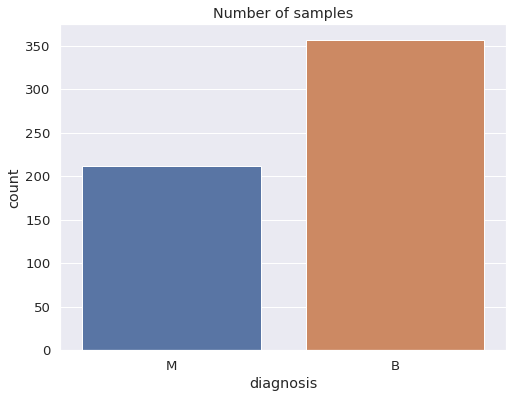

In [ ]:
sns.countplot(data=df_breast, x="diagnosis").set_title("Number of samples")

Let's plot a simple relational plot using `relplot()`

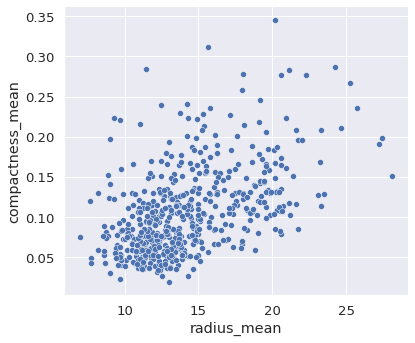

In [ ]:
sns.relplot(data=df_breast, x="radius_mean", y="compactness_mean", aspect=1.2)

You can also plot your data and a regression line with estimated uncertainty using `lmplot()`

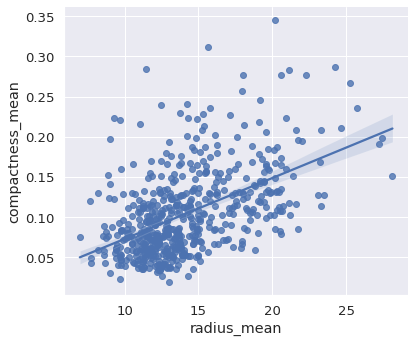

In [ ]:
sns.lmplot(data=df_breast, x="radius_mean", y="compactness_mean", aspect=1.2)

A more informative plot could be obtained by stratifying the data with respect to *diagnosis*

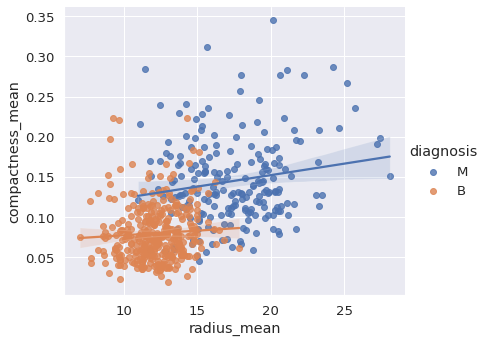

In [ ]:
sns.lmplot(
    data=df_breast,
    x="radius_mean",
    y="compactness_mean",
    hue="diagnosis",
    aspect=1.2
)

Let's say instead we want to investigate the distribution of our data. We can use `displot()`

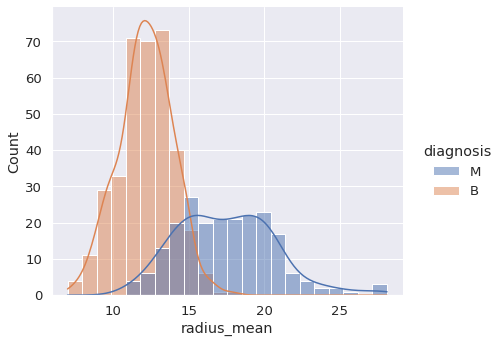

In [ ]:
sns.displot(
    data=df_breast,
    x="radius_mean",
    kde=True,
    hue="diagnosis",
    aspect=1.2
)

Or use `boxplot()`

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

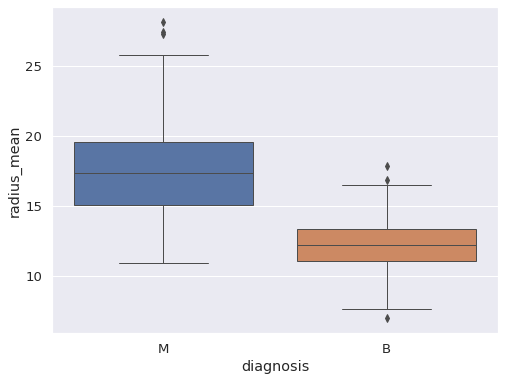

In [ ]:
sns.boxplot(
    data=df_breast,
    x="diagnosis",
    y="radius_mean",
    linewidth=1
)

You can obtain a combination of relational plot and distribution plot using `jointplot()`

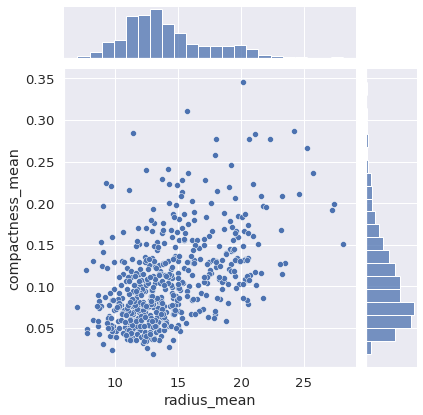

In [ ]:
sns.jointplot(data=df_breast, x="radius_mean", y="compactness_mean")

And of course you can stratify it by *diagnosis*

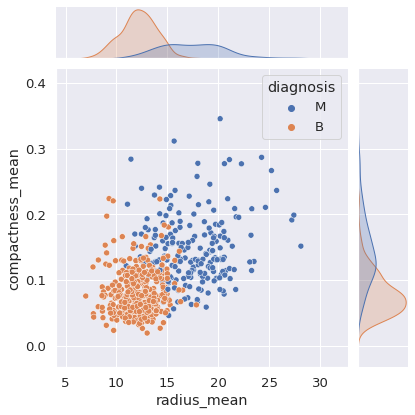

In [ ]:
sns.jointplot(
    data=df_breast,
    x="radius_mean",
    y="compactness_mean",
    hue="diagnosis"
)

To check for potential correlations across several variables in the same plot you can use `pairplot()`

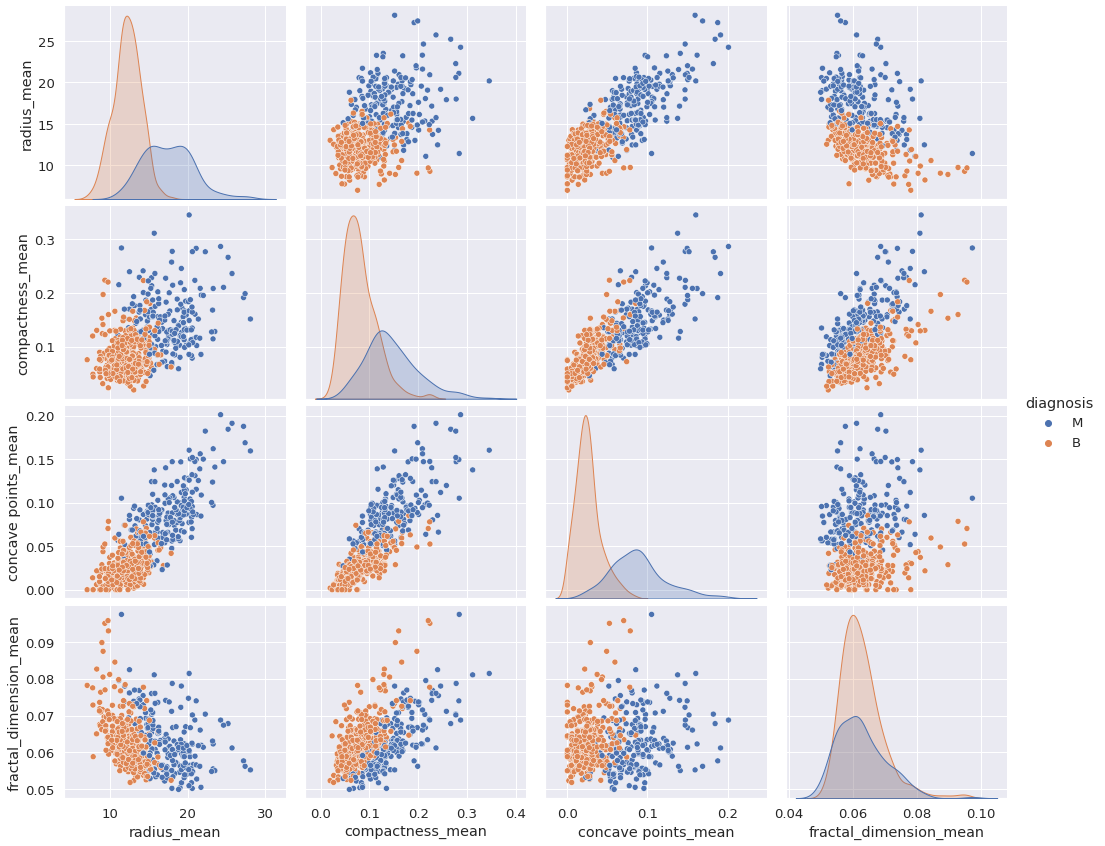

In [ ]:
sns.pairplot(
    data=df_breast,
    vars=["radius_mean", "compactness_mean", "concave points_mean", "fractal_dimension_mean"],
    hue="diagnosis",
    height=3,
    aspect=1.2
)

You can visually plot the correlation between the features with `heatmap()`

<Axes: >

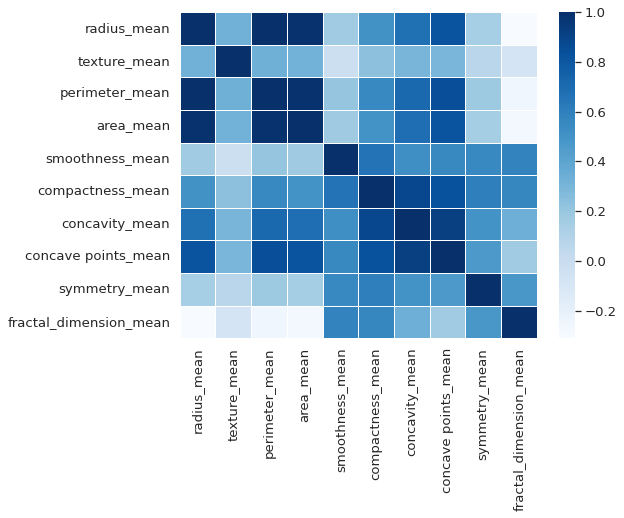

In [ ]:
sns.heatmap(
    data=df_breast.iloc[:, 2:12].corr(),
    cmap="Blues",
    linewidth=1
)

Seaborn offers also a lot of customization options for your plots

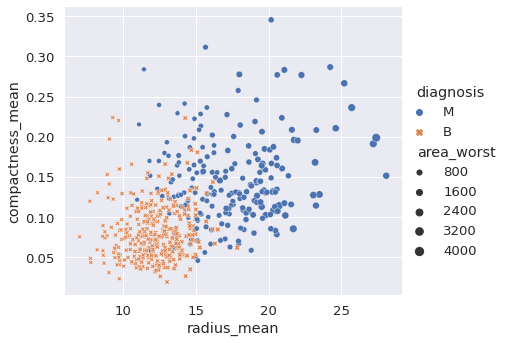

In [ ]:
sns.relplot(
    data=df_breast,
    x="radius_mean",
    y="compactness_mean",
    hue="diagnosis",
    style="diagnosis",
    size="area_worst",
    aspect=1.2
)

# References

1. NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html
2. NumPy basics: https://numpy.org/doc/stable/user/absolute_beginners.html
3. Introduction to pandas data structures: https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro
4. Exercises on pandas: https://github.com/guipsamora/pandas_exercises
5. Breast Cancer Wisconsin (Diagnostic) Data Set: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
6. Introduction to seaborn: https://seaborn.pydata.org/tutorial/introduction.html
7. Seaborn functional API: https://seaborn.pydata.org/api.html#function-interface